The following additional libraries are needed to run this
notebook. Note that running on Colab is experimental, please report a Github
issue if you have any problem.

In [ ]:
!pip install d2l==0.17.1


# Autovalores e Autovetores
:label:`sec_eigendecompositions`


Os autovalores são frequentemente uma das noções mais úteis
encontraremos ao estudar álgebra linear,
entretanto, como um iniciante, é fácil ignorar sua importância.
Abaixo, apresentamos a decomposção e cálculo destes, e
tentamos transmitir algum sentido de por que é tão importante.

Suponha que tenhamos uma matriz $A$ com as seguintes entradas:

$$
\mathbf{A} = \begin{bmatrix}
2 & 0 \\
0 & -1
\end{bmatrix}.
$$


Se aplicarmos $A$ a qualquer vetor $\mathbf{v} = [x, y]^\top$, 
obtemos um vetor $\mathbf{A}\mathbf{v} = [2x, -y]^\top$.
Isso tem uma interpretação intuitiva:
estique o vetor para ser duas vezes mais largo na direção $x$,
e, em seguida, inverta-o na direção $y$-direcionamento.

No entanto, existem *alguns* vetores para os quais algo permanece inalterado.
A saber, $[1, 0]^\top$ é enviado para $[2, 0]^\top$
e $[0, 1]^\top$ é enviado para $[0, -1]^\top$.
Esses vetores ainda estão na mesma linha,
e a única modificação é que a matriz os estica
por um fator de $2$ e $-1$ respectivamente.
Chamamos esses vetores de *autovetores*
e o fator eles são estendidos por *autovalores*.

Em geral, se pudermos encontrar um número $\lambda$ 
e um vetor $\mathbf{v}$ tal que

$$
\mathbf{A}\mathbf{v} = \lambda \mathbf{v}.
$$

Dizemos que $\mathbf{v}$ é um autovetor para $A$ e $\lambda$ é um autovalor.

## Encontrando Autovalores
Vamos descobrir como encontrá-los. Subtraindo $\lambda \mathbf{v}$ de ambos os lados,
e então fatorar o vetor,
vemos que o acima é equivalente a:

$$(\mathbf{A} - \lambda \mathbf{I})\mathbf{v} = 0.$$
:eqlabel:`eq_eigvalue_der`

Para :eqref:`eq_eigvalue_der` acontecer, vemos que $(\mathbf{A} - \lambda \mathbf{I})$ 
deve comprimir alguma direção até zero,
portanto, não é invertível e, portanto, o determinante é zero.
Assim, podemos encontrar os *valores próprios*
descobrindo quanto $\lambda$ is $\det(\mathbf{A}-\lambda \mathbf{I}) = 0$.
Depois de encontrar os valores próprios, podemos resolver
$\mathbf{A}\mathbf{v} = \lambda \mathbf{v}$ 
para encontrar os *autovetores* associados.

### Um Exemplo
Vamos ver isso com uma matriz mais desafiadora

$$
\mathbf{A} = \begin{bmatrix}
2 & 1\\
2 & 3 
\end{bmatrix}.
$$

Se considerarmos $\det(\mathbf{A}-\lambda \mathbf{I}) = 0$, 
vemos que isso é equivalente à equação polinomial
$0 = (2-\lambda)(3-\lambda)-2 = (4-\lambda)(1-\lambda)$.
Assim, dois valores próprios são $4$ e $1$.
Para encontrar os vetores associados, precisamos resolver

$$
\begin{bmatrix}
2 & 1\\
2 & 3 
\end{bmatrix}\begin{bmatrix}x \\ y\end{bmatrix} = \begin{bmatrix}x \\ y\end{bmatrix}  \; \text{and} \;
\begin{bmatrix}
2 & 1\\
2 & 3 
\end{bmatrix}\begin{bmatrix}x \\ y\end{bmatrix}  = \begin{bmatrix}4x \\ 4y\end{bmatrix} .
$$


Podemos resolver isso com os vetores $[1, -1]^\top$ and $[1, 2]^\top$ respectivamente.

Podemos verificar isso no código usando a rotina incorporada `numpy.linalg.eig`.


In [1]:
%matplotlib inline
import tensorflow as tf
from IPython import display
from d2l import tensorflow as d2l

tf.linalg.eig(tf.constant([[2, 1], [2, 3]], dtype=tf.float64))

(<tf.Tensor: shape=(2,), dtype=complex128, numpy=array([1.+0.j, 4.+0.j])>,
 <tf.Tensor: shape=(2, 2), dtype=complex128, numpy=
 array([[-0.70710678+0.j, -0.4472136 +0.j],
        [ 0.70710678+0.j, -0.89442719+0.j]])>)

Observe que `numpy` normaliza os vetores próprios para ter comprimento um,
ao passo que consideramos o nosso comprimento arbitrário.
Além disso, a escolha do sinal é arbitrária.
No entanto, os vetores calculados são paralelos
aos que encontramos à mão com os mesmos autovalores.

## Matrizes de Decomposição
Vamos continuar o exemplo anterior um passo adiante. Deixe

$$
\mathbf{W} = \begin{bmatrix}
1 & 1 \\
-1 & 2
\end{bmatrix},
$$

ser a matriz onde as colunas são os autovetores da matriz $\mathbf{A}$. Deixe

$$
\boldsymbol{\Sigma} = \begin{bmatrix}
1 & 0 \\
0 & 4
\end{bmatrix},
$$

ser a matriz com os autovalores associados na diagonal.
Então, a definição de autovalores e autovetores nos diz que

$$
\mathbf{A}\mathbf{W} =\mathbf{W} \boldsymbol{\Sigma} .
$$

A matriz $W$ é invertível, então podemos multiplicar ambos os lados por $W^{-1}$ à direita,
nós vemos que podemos escrever

$$\mathbf{A} = \mathbf{W} \boldsymbol{\Sigma} \mathbf{W}^{-1}.$$
:eqlabel:`eq_eig_decomp`

Na próxima seção, veremos algumas consequências interessantes disso,
mas por agora só precisamos saber que tal decomposição
existirá enquanto pudermos encontrar uma coleção completa
de autovetores linearmente independentes (de forma que $W$ seja invertível).

## Operações em Autovalores e Autovetores
Uma coisa boa sobre autovalores e autovetores :eqref:`eq_eig_decomp` é que
podemos escrever muitas operações que geralmente encontramos de forma limpa
em termos da decomposição automática. Como primeiro exemplo, considere:

$$
\mathbf{A}^n = \overbrace{\mathbf{A}\cdots \mathbf{A}}^{\text{$n$ times}} = \overbrace{(\mathbf{W}\boldsymbol{\Sigma} \mathbf{W}^{-1})\cdots(\mathbf{W}\boldsymbol{\Sigma} \mathbf{W}^{-1})}^{\text{$n$ times}} =  \mathbf{W}\overbrace{\boldsymbol{\Sigma}\cdots\boldsymbol{\Sigma}}^{\text{$n$ times}}\mathbf{W}^{-1} = \mathbf{W}\boldsymbol{\Sigma}^n \mathbf{W}^{-1}.
$$

Isso nos diz que para qualquer poder positivo de uma matriz,
a autodecomposição é obtida apenas elevando os autovalores à mesma potência.
O mesmo pode ser mostrado para potências negativas,
então, se quisermos inverter uma matriz, precisamos apenas considerar

$$
\mathbf{A}^{-1} = \mathbf{W}\boldsymbol{\Sigma}^{-1} \mathbf{W}^{-1},
$$


ou em outras palavras, apenas inverta cada autovalor.
Isso funcionará, desde que cada autovalor seja diferente de zero,
portanto, vemos que invertível é o mesmo que não ter autovalores zero.

De fato, um trabalho adicional pode mostrar que se $\lambda_1, \ldots, \lambda_n$ 
são os autovalores de uma matriz, então o determinante dessa matriz é

$$
\det(\mathbf{A}) = \lambda_1 \cdots \lambda_n,
$$


ou o produto de todos os autovalores.
Isso faz sentido intuitivamente porque qualquer coisa que esticar $\mathbf{W}$ faz,
$W^{-1}$ desfaz, então, no final, o único alongamento que acontece é
por multiplicação pela matriz diagonal $\boldsymbol{\Sigma}$, 
que estica os volumes pelo produto dos elementos diagonais.

Por fim, lembre-se de que a classificação era o número máximo
de colunas linearmente independentes de sua matriz.
Examinando a decomposição de perto,
podemos ver que a classificação é a mesma
que o número de autovalores diferentes de zero de $\mathbf{A}$.

Os exemplos podem continuar, mas espero que o ponto esteja claro:
A autodecomposição pode simplificar muitos cálculos algébricos lineares
e é uma operação fundamental subjacente a muitos algoritmos numéricos
e muitas das análises que fazemos em álgebra linear.

## Composições Originais de Matrizes Simétricas
Nem sempre é possível encontrar autovetores independentes linearmente suficientes
para que o processo acima funcione. Por exemplo, a matriz

$$
\mathbf{A} = \begin{bmatrix}
1 & 1 \\
0 & 1
\end{bmatrix},
$$


tem apenas um único autovetor, a saber $(1, 0)^\top$. 
Para lidar com essas matrizes, exigimos técnicas mais avançadas
do que podemos cobrir (como a Forma Normal de Jordan ou Decomposição de Valor Singular).
Frequentemente precisaremos restringir nossa atenção a essas matrizes
onde podemos garantir a existência de um conjunto completo de autovetores.

A família mais comumente encontrada são as *matrizes simétricas*,
que são aquelas matrizes onde $\mathbf{A} = \mathbf{A}^\top$. 

Neste caso, podemos tomar $W$ como uma *matriz ortogonal* - uma matriz cujas colunas são todas vetores de comprimento unitário que estão em ângulos retos entre si, onde
$\mathbf{W}^\top = \mathbf{W}^{-1}$ -- e todos os autovalores serão reais.
Assim, neste caso especial, podemos escrever :eqref:`eq_eig_decomp` como

$$
\mathbf{A} = \mathbf{W}\boldsymbol{\Sigma}\mathbf{W}^\top .
$$

## Teorema do Círculo de Gershgorin

Os valores próprios costumam ser difíceis de raciocinar intuitivamente.
Se for apresentada uma matriz arbitrária, pouco pode ser dito
sobre quais são os valores próprios sem computá-los.
Há, no entanto, um teorema que pode facilitar uma boa aproximação
se os maiores valores estiverem na diagonal.

Seja $\mathbf{A} = (a_{ij})$ qualquer matriz quadrada($n\times n$).
Definiremos $r_i = \sum_{j \neq i} |a_{ij}|$.
Deixe $\mathcal{D}_i$ representar o disco no plano complexo
com centro $a_{ii}$ radius $r_i$.
Então, cada autovalor de $\mathbf{A}$ está contido em um dos $\mathcal{D}_i$.

Isso pode ser um pouco difícil de descompactar, então vejamos um exemplo.
Considere a matriz:

$$
\mathbf{A} = \begin{bmatrix}
1.0 & 0.1 & 0.1 & 0.1 \\
0.1 & 3.0 & 0.2 & 0.3 \\
0.1 & 0.2 & 5.0 & 0.5 \\
0.1 & 0.3 & 0.5 & 9.0
\end{bmatrix}.
$$

Temos $r_1 = 0.3$, $r_2 = 0.6$, $r_3 = 0.8$ e $r_4 = 0.9$.
A matriz é simétrica, portanto, todos os autovalores são reais.
Isso significa que todos os nossos valores próprios estarão em um dos intervalos de

$$[a_{11}-r_1, a_{11}+r_1] = [0.7, 1.3], $$

$$[a_{22}-r_2, a_{22}+r_2] = [2.4, 3.6], $$

$$[a_{33}-r_3, a_{33}+r_3] = [4.2, 5.8], $$

$$[a_{44}-r_4, a_{44}+r_4] = [8.1, 9.9]. $$


Realizar o cálculo numérico mostra
que os valores próprios são aproximadamente $0.99$, $2.97$, $4.95$, $9.08$,
tudo confortavelmente dentro das faixas fornecidas.


In [2]:
A = tf.constant([[1.0, 0.1, 0.1, 0.1],
                [0.1, 3.0, 0.2, 0.3],
                [0.1, 0.2, 5.0, 0.5],
                [0.1, 0.3, 0.5, 9.0]])

v, _ = tf.linalg.eigh(A)
v

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.99228525, 2.9734395 , 4.953943  , 9.080336  ], dtype=float32)>

Desta forma, os autovalores podem ser aproximados,
e as aproximações serão bastante precisas
no caso em que a diagonal é
significativamente maior do que todos os outros elementos.

É uma coisa pequena, mas com um complexo
e um tópico sutil como; decomposição automática,
é bom obter qualquer compreensão intuitiva possível.

## Uma Aplicação Útil: o Crescimento de Mapas Iterados

Agora que entendemos o que são autovetores, em princípio,
vamos ver como eles podem ser usados para fornecer um entendimento profundo
de um problema central para o comportamento da rede neural: inicialização de peso adequada.

### Autovetores como Comportamento de Longo Prazo

A investigação matemática completa da inicialização
de redes neurais profundas está além do escopo do texto,
mas podemos ver uma versão de brinquedo aqui para entender
como os autovalores podem nos ajudar a ver como esses modelos funcionam.
Como sabemos, as redes neurais operam por camadas intercaladas
de transformações lineares com operações não lineares.
Para simplificar aqui, vamos supor que não há não linearidade,
e que a transformação é uma única operação de matriz repetida $A$,
para que a saída do nosso modelo seja

$$
\mathbf{v}_{out} = \mathbf{A}\cdot \mathbf{A}\cdots \mathbf{A} \mathbf{v}_{in} = \mathbf{A}^N \mathbf{v}_{in}.
$$

Quando esses modelos são inicializados, $A$ é considerado
uma matriz aleatória com entradas gaussianas, então vamos fazer uma delas.
Para ser concreto, começamos com uma média zero, variância um Gaussiana distribuída $5 \times 5$ matriz.


In [3]:
k = 5
A = tf.random.normal((k, k), dtype=tf.float64)
A

<tf.Tensor: shape=(5, 5), dtype=float64, numpy=
array([[ 0.54033768,  1.14969358, -0.12823432,  0.10844442,  1.7697293 ],
       [-1.84673914, -0.09494241, -1.25385185, -1.02594442,  1.10771506],
       [ 0.40692971, -2.08210485,  0.15228948,  0.23123547, -1.29279008],
       [ 0.45095319,  0.18916681,  0.51390909, -0.51223332, -0.27779001],
       [-2.10975382,  0.48282145, -0.75738635, -0.74371874, -0.92466642]])>

### Behavior on Random Data
Para simplificar nosso modelo de brinquedo,
vamos assumir que o vetor de dados que alimentamos em $\mathbf{v}_{in}$ 
é um vetor gaussiano aleatório de cinco dimensões.
Vamos pensar sobre o que queremos que aconteça.
Para contextualizar, vamos pensar em um problema genérico de ML,
onde estamos tentando transformar dados de entrada, como uma imagem, em uma previsão,
como a probabilidade de a imagem ser a foto de um gato.
Se a aplicação repetida de $\mathbf{A}$ 
estende um vetor aleatório para ser muito longo,
então, pequenas mudanças na entrada serão amplificadas
em grandes mudanças na saída --- pequenas modificações da imagem de entrada
levaria a previsões muito diferentes.
Isso não parece certo!


Por outro lado, se $\mathbf{A}$ encolhe vetores aleatórios para serem mais curtos,
então, depois de passar por muitas camadas, o vetor irá essencialmente encolher a nada,
e a saída não dependerá da entrada. Isso também claramente não está certo!

Precisamos andar na linha estreita entre o crescimento e a decadência
para ter certeza de que nossa saída muda dependendo de nossa entrada, mas não muito!

Vamos ver o que acontece quando multiplicamos repetidamente nossa matriz $\mathbf{A}$ 
contra um vetor de entrada aleatório e acompanhe a norma.


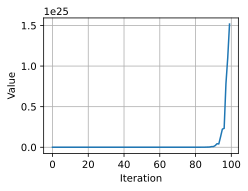

In [4]:
# Calculate the sequence of norms after repeatedly applying `A`
v_in = tf.random.normal((k, 1), dtype=tf.float64)

norm_list = [tf.norm(v_in).numpy()]
for i in range(1, 100):
    v_in = tf.matmul(A, v_in)
    norm_list.append(tf.norm(v_in).numpy())

d2l.plot(tf.range(0, 100), norm_list, 'Iteration', 'Value')

The norm is growing uncontrollably! 
Indeed if we take the list of quotients, we will see a pattern.


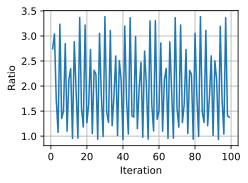

In [5]:
# Compute the scaling factor of the norms
norm_ratio_list = []
for i in range(1, 100):
    norm_ratio_list.append(norm_list[i]/norm_list[i - 1])

d2l.plot(tf.range(1, 100), norm_ratio_list, 'Iteration', 'Ratio')

Se olharmos para a última parte do cálculo acima,
vemos que o vetor aleatório é alongado por um fator de `1.974459321485[...]`,
onde a parte no final muda um pouco,
mas o fator de alongamento é estável.

### Relacionando-se com os Autovetores

Vimos que autovetores e autovalores correspondem
na medida em que algo é esticado,
mas isso era para vetores específicos e trechos específicos.
Vamos dar uma olhada no que eles são para $\mathbf{A}$.
Uma pequena advertência aqui: acontece que, para ver todos eles,
precisaremos ir para os números complexos.
Você pode pensar nisso como alongamentos e rotações.
Pegando a norma do número complexo
(raiz quadrada das somas dos quadrados das partes reais e imaginárias)
podemos medir esse fator de alongamento. Deixe-nos também classificá-los.


In [6]:
# Compute the eigenvalues
eigs = tf.linalg.eigh(A)[0].numpy().tolist()
norm_eigs = [tf.abs(tf.constant(x, dtype=tf.float64)) for x in eigs]
norm_eigs.sort()
print(f'norms of eigenvalues: {norm_eigs}')

norms of eigenvalues: [<tf.Tensor: shape=(), dtype=float64, numpy=0.3025611838102712>, <tf.Tensor: shape=(), dtype=float64, numpy=0.4868280506877184>, <tf.Tensor: shape=(), dtype=float64, numpy=1.9518847176957475>, <tf.Tensor: shape=(), dtype=float64, numpy=3.094094691612556>, <tf.Tensor: shape=(), dtype=float64, numpy=4.022497546471696>]


### Uma Observação

Vemos algo um pouco inesperado acontecendo aqui:
aquele número que identificamos antes para o
alongamento de longo prazo de nossa matriz $\mathbf{A}$ 
aplicado a um vetor aleatório é  *exatamente*
(com precisão de treze casas decimais!)
o maior autovalor de $\mathbf{A}$.
Isso claramente não é uma coincidência!

Mas, se agora pensarmos sobre o que está acontecendo geometricamente,
isso começa a fazer sentido. Considere um vetor aleatório.
Este vetor aleatório aponta um pouco em todas as direções,
então, em particular, ele aponta pelo menos um pouco
na mesma direção do vetor próprio de $\mathbf{A}$
associado ao maior autovalor.
Isso é tão importante que se chama
o *autovalor principal* e o *autovetor principal*.
Depois de aplicar $\mathbf{A}$, nosso vetor aleatório
é esticado em todas as direções possíveis,
como está associado a cada autovetor possível,
mas é esticado principalmente na direção
associado a este autovetor principal.
O que isso significa é que depois de aplicar em $A$,
nosso vetor aleatório é mais longo e aponta em uma direção
mais perto de estar alinhado com o autovetor principal.
Depois de aplicar a matriz várias vezes,
o alinhamento com o autovetor principal torna-se cada vez mais próximo até que,
para todos os efeitos práticos, nosso vetor aleatório foi transformado
no autovetor principal!
Na verdade, este algoritmo é a base
para o que é conhecido como *iteração de energia*
para encontrar o maior autovalor e autovetor de uma matriz. Para obter detalhes, consulte, por exemplo :cite:`Van-Loan.Golub.1983`.

### Corrigindo a Normalização

Agora, das discussões acima, concluímos
que não queremos que um vetor aleatório seja esticado ou esmagado,
gostaríamos que os vetores aleatórios permanecessem do mesmo tamanho durante todo o processo.
Para fazer isso, agora redimensionamos nossa matriz por este autovalor principal
de modo que o maior autovalor é agora apenas um.
Vamos ver o que acontece neste caso.


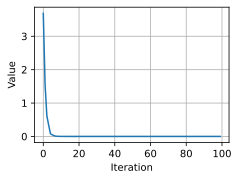

In [7]:
# Rescale the matrix `A`
A /= norm_eigs[-1]

# Do the same experiment again
v_in = tf.random.normal((k, 1), dtype=tf.float64)

norm_list = [tf.norm(v_in).numpy()]
for i in range(1, 100):
    v_in = tf.matmul(A, v_in)
    norm_list.append(tf.norm(v_in).numpy())

d2l.plot(tf.range(0, 100), norm_list, 'Iteration', 'Value')

Também podemos traçar a proporção entre as normas consecutivas como antes e ver que de fato ela se estabiliza.


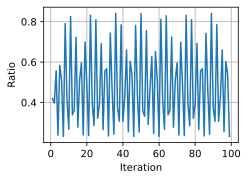

In [8]:
# Also plot the ratio
norm_ratio_list = []
for i in range(1, 100):
    norm_ratio_list.append(norm_list[i]/norm_list[i-1])

d2l.plot(tf.range(1, 100), norm_ratio_list, 'Iteration', 'Ratio')

## Conclusões

Agora vemos exatamente o que esperávamos!
Depois de normalizar as matrizes pelo autovalor principal,
vemos que os dados aleatórios não explodem como antes,
mas, em vez disso, eventualmente se equilibram com um valor específico.
Seria bom ser capaz de fazer essas coisas desde os primeiros princípios,
e acontece que se olharmos profundamente para a matemática disso,
podemos ver que o maior autovalor de uma grande matriz aleatória com média independente de zero, variância de uma entrada gaussiana é em média cerca de $\sqrt{n}$,
ou no nosso caso $\sqrt{5} \approx 2.2$,
devido a um fato fascinante conhecido como a *lei circular* :cite:`Ginibre.1965`.
A relação entre os valores próprios (e um objeto relacionado chamado valores singulares) de matrizes aleatórias demonstrou ter conexões profundas para a inicialização adequada de redes neurais, como foi discutido em :cite:`Pennington.Schoenholz.Ganguli.2017` e trabalhos subsequentes.

## Resumo
* Autovetores são vetores que são alongados por uma matriz sem mudar de direção.
* Os autovalores são a quantidade em que os autovetores são alongados pela aplicação da matriz.
* A autodecomposição em autovalores e autovetores de uma matriz pode permitir que muitas operações sejam reduzidas a operações nos autovalores.
* O Teorema do Círculo de Gershgorin pode fornecer valores aproximados para os autovalores de uma matriz.
* O comportamento das potências da matriz iterada depende principalmente do tamanho do maior autovalor. Esse entendimento tem muitas aplicações na teoria de inicialização de redes neurais.

## Exercícios
1. Quais são os autovalores e autovetores de
$$
\mathbf{A} = \begin{bmatrix}
2 & 1 \\
1 & 2
\end{bmatrix}?
$$
1. Quais são os autovalores e autovetores da matriz a seguir, e o que há de estranho neste exemplo em comparação com o anterior?
$$
\mathbf{A} = \begin{bmatrix}
2 & 1 \\
0 & 2
\end{bmatrix}.
$$
1. Sem calcular os autovalores, é possível que o menor autovalor da matriz a seguir seja menor que $0,5$? *Nota*: este problema pode ser feito na sua cabeça.
$$
\mathbf{A} = \begin{bmatrix}
3.0 & 0.1 & 0.3 & 1.0 \\
0.1 & 1.0 & 0.1 & 0.2 \\
0.3 & 0.1 & 5.0 & 0.0 \\
1.0 & 0.2 & 0.0 & 1.8
\end{bmatrix}.
$$


[Discussões](https://discuss.d2l.ai/t/1087)


<!--stackedit_data:
eyJoaXN0b3J5IjpbMjA2OTgwNTU3OSw5NDg3NzIyODgsLTc1Mz
A0NTUzMCwtMjUzNjM1OTQwLC0xNjg5ODU5MzUwLC0xNzA0OTMx
ODI5LC0xMjU2MTY3NTg0LC0zMTM4Nzc0MDAsLTEyNjk5MjAwMT
csMTU2ODM0MDE4NCwtMTE0ODUzOTM5OSwxNDM0NTYwMTY0LDY5
MTE5ODU2OSw0ODM4MTEzMDYsMjYwNjIxODU3LC0xNjA2NDkxMz
g4LC0xNzI5MDE0ODY0XX0=
-->
